In [12]:
#!pip install wordcloud

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [5]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80374 entries, 0 to 80373
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                80374 non-null  object 
 1   town                 80374 non-null  object 
 2   flat_type            80374 non-null  object 
 3   block                80374 non-null  object 
 4   street_name          80374 non-null  object 
 5   storey_range         80374 non-null  object 
 6   floor_area_sqm       80374 non-null  float64
 7   flat_model           80374 non-null  object 
 8   lease_commence_date  80374 non-null  int64  
 9   remaining_lease      80374 non-null  object 
 10  resale_price         80374 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 6.7+ MB


In [7]:
df.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,80374.000000,80374.000000,8.037400e+04
mean,97.617804,1994.117501,4.393165e+05
std,24.285811,12.839267,1.533902e+05
min,31.000000,1966.000000,1.400000e+05
25%,82.000000,1984.000000,3.300000e+05
50%,95.000000,1994.000000,4.100000e+05
75%,113.000000,2003.000000,5.150000e+05
max,249.000000,2019.000000,1.258000e+06


In [9]:
df.isna().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [10]:
df['month'] = pd.to_datetime(df['month'], format='%Y-%m')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80374 entries, 0 to 80373
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   month                80374 non-null  datetime64[ns]
 1   town                 80374 non-null  object        
 2   flat_type            80374 non-null  object        
 3   block                80374 non-null  object        
 4   street_name          80374 non-null  object        
 5   storey_range         80374 non-null  object        
 6   floor_area_sqm       80374 non-null  float64       
 7   flat_model           80374 non-null  object        
 8   lease_commence_date  80374 non-null  int64         
 9   remaining_lease      80374 non-null  object        
 10  resale_price         80374 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 6.7+ MB


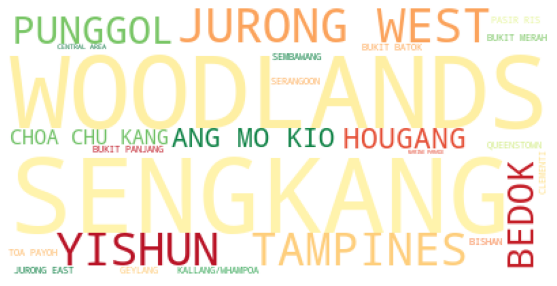

{'SENGKANG': 6408,
 'WOODLANDS': 6019,
 'JURONG WEST': 5984,
 'YISHUN': 5641,
 'TAMPINES': 5235,
 'PUNGGOL': 5119,
 'BEDOK': 4356,
 'HOUGANG': 3848,
 'ANG MO KIO': 3613,
 'CHOA CHU KANG': 3333,
 'BUKIT PANJANG': 3197,
 'BUKIT MERAH': 3097,
 'BUKIT BATOK': 2953,
 'TOA PAYOH': 2646,
 'PASIR RIS': 2421,
 'KALLANG/WHAMPOA': 2275,
 'QUEENSTOWN': 2140,
 'SEMBAWANG': 2104,
 'GEYLANG': 1928,
 'JURONG EAST': 1793,
 'CLEMENTI': 1785,
 'SERANGOON': 1601,
 'BISHAN': 1535,
 'CENTRAL AREA': 658,
 'MARINE PARADE': 465,
 'BUKIT TIMAH': 220}

In [15]:
data = df['town'].value_counts().to_dict()
wc = WordCloud(colormap='RdYlGn', background_color='white',).generate_from_frequencies(data)
plt.figure( figsize=(15,5))
plt.tight_layout(pad=0)
plt.imshow(wc)
plt.axis('off')
plt.show()
data

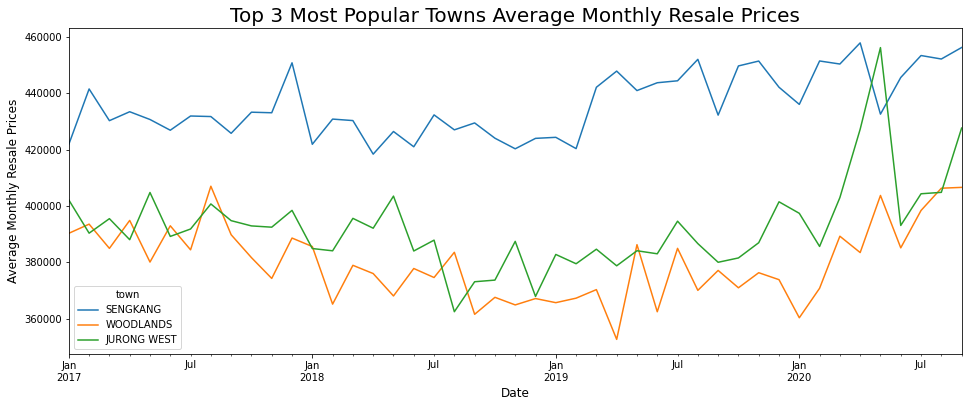

In [16]:
price_by_town = df.pivot_table(values='resale_price', index='town', columns='month')
price_by_town.transpose()[['SENGKANG','WOODLANDS','JURONG WEST']].plot(figsize=(16,6))
plt.title('Top 3 Most Popular Towns Average Monthly Resale Prices', size=20)
plt.xlabel('Date', size=12)
plt.ylabel('Average Monthly Resale Prices', size=12)
print()

In [17]:
df_town = df.groupby('town').describe()['resale_price']
df_town

,count,mean,std,min,25%,50%,75%,max
town,,,,,,,,
ANG MO KIO,3613.0,408721.693330,171522.847812,174000.0,280000.0,345000.0,485000.0,1030000.0
BEDOK,4356.0,409326.421717,149255.483874,180000.0,290000.0,365000.0,500000.0,928000.0
BISHAN,1535.0,641257.113355,179211.690372,210000.0,514500.0,620000.0,768000.0,1180000.0
BUKIT BATOK,2953.0,380315.709702,124135.917728,208000.0,272000.0,355000.0,448000.0,890000.0
BUKIT MERAH,3097.0,562568.517882,211675.216036,157000.0,355000.0,580000.0,738000.0,1200000.0
BUKIT PANJANG,3197.0,427985.359399,108406.601461,200000.0,342800.0,420000.0,485000.0,840000.0
BUKIT TIMAH,220.0,711565.245455,187525.217851,370000.0,573750.0,713444.0,875000.0,1058000.0
CENTRAL AREA,658.0,617038.942249,258923.653944,200000.0,410000.0,500000.0,890000.0,1258000.0
CHOA CHU KANG,3333.0,388410.044704,80816.316758,200000.0,330000.0,370000.0,430000.0,900000.0


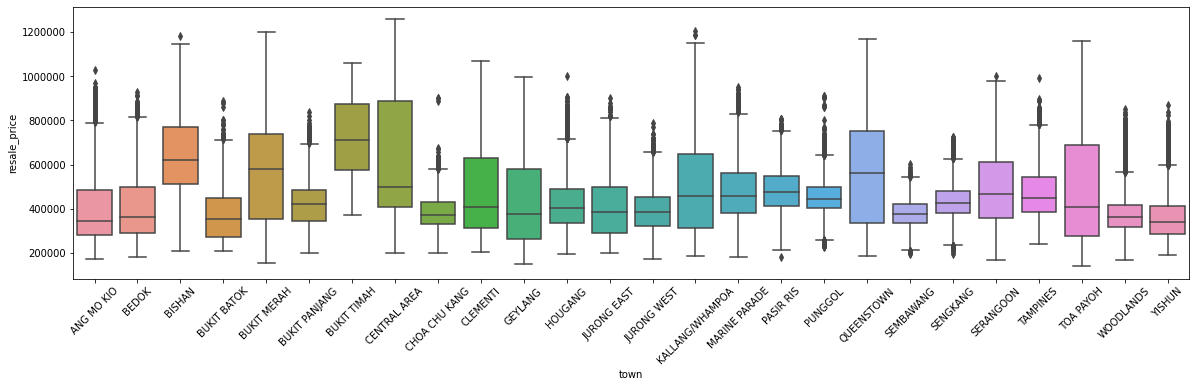

In [18]:
#Boxplots and outliers by town
plt.figure(figsize=(20,5))
ax1 = sns.boxplot(x='town', y='resale_price', data=df)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
print()

In [19]:
df_flat_type = df.groupby('flat_type').describe()['resale_price']
df_flat_type

,count,mean,std,min,25%,50%,75%,max
flat_type,,,,,,,,
1 ROOM,37.0,183899.135135,17927.166998,157000.0,172000.0,180000.0,190000.0,232000.0
2 ROOM,1240.0,232809.029839,35284.925117,150000.0,210000.0,230000.0,250000.0,418000.0
3 ROOM,19420.0,307468.115133,73495.913048,140000.0,262000.0,290000.0,333000.0,1185000.0
4 ROOM,33282.0,434003.756724,119392.276853,218000.0,353000.0,405000.0,470000.0,1186888.0
5 ROOM,19947.0,529469.576041,148379.432786,270000.0,423000.0,480888.0,590000.0,1258000.0
EXECUTIVE,6411.0,625121.420314,117659.698683,390000.0,540000.0,600000.0,690000.0,1160000.0
MULTI-GENERATION,37.0,800258.162162,79445.620852,660000.0,740000.0,788888.0,840000.0,990000.0


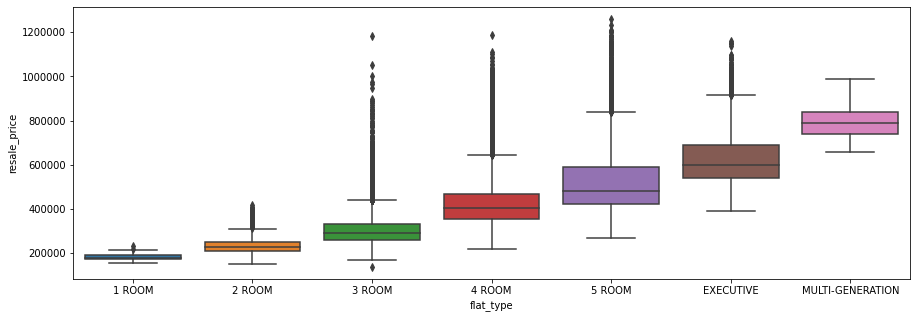

In [20]:
#Boxplots and outliers by flat type
plt.figure(figsize=(15,5))
ax2 = sns.boxplot(x='flat_type', y='resale_price', data=df, order=['1 ROOM','2 ROOM','3 ROOM','4 ROOM','5 ROOM','EXECUTIVE','MULTI-GENERATION'])
plt.ticklabel_format(style='plain', axis='y')
print()

In [21]:
#returns descriptive data
df_storey_range = df.groupby('storey_range').describe()['resale_price']
df_storey_range

,count,mean,std,min,25%,50%,75%,max
storey_range,,,,,,,,
01 TO 03,14471.0,3.945908e+05,131519.886445,150000.0,301944.0,368000.00,453884.00,1185000.0
04 TO 06,18697.0,4.132428e+05,136134.739975,150000.0,315000.0,388000.00,480000.00,1088000.0
07 TO 09,16944.0,4.244899e+05,135927.712089,165000.0,326725.0,402000.00,490297.00,1055000.0
10 TO 12,15173.0,4.385688e+05,141950.032423,140000.0,335000.0,415000.00,513000.00,1088000.0
13 TO 15,7519.0,4.739013e+05,141723.024408,170000.0,380000.0,445000.00,543000.00,1140000.0
16 TO 18,3421.0,5.142354e+05,159473.963047,180100.0,405000.0,470000.00,610000.00,1050000.0
19 TO 21,1485.0,5.845175e+05,190572.019123,180000.0,435000.0,582000.00,735000.00,1160000.0
22 TO 24,1099.0,6.066680e+05,187387.870679,205000.0,450000.0,588888.88,751000.00,1138000.0
25 TO 27,604.0,6.599328e+05,187417.071474,230000.0,485000.0,677944.00,807665.75,1150000.0


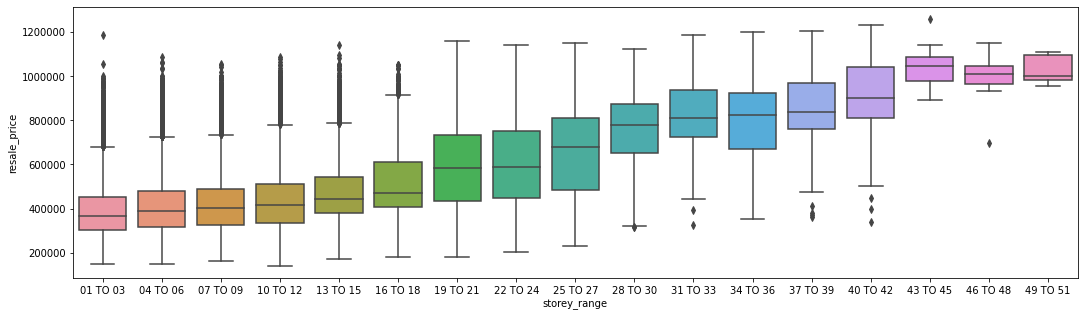

In [22]:
#Boxplots and outliers by storey range
plt.figure(figsize=(18,5))
ax3 = sns.boxplot(x='storey_range', y='resale_price', data=df, order=['01 TO 03','04 TO 06','07 TO 09','10 TO 12','13 TO 15',
                                                                      '16 TO 18','19 TO 21','22 TO 24','25 TO 27','28 TO 30',
                                                                      '31 TO 33','34 TO 36','37 TO 39','40 TO 42','43 TO 45','46 TO 48','49 TO 51'])
plt.ticklabel_format(style='plain', axis='y')
print()

In [21]:
25383.5/3.526955675976101

7197.0